
Information About Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store ID               30000 non-null  object 
 1   Product ID             30000 non-null  int64  
 2   Date                   30000 non-null  object 
 3   Units Sold             30000 non-null  int64  
 4   Sales Revenue (USD)    30000 non-null  float64
 5   Discount Percentage    30000 non-null  int64  
 6   Marketing Spend (USD)  30000 non-null  int64  
 7   Store Location         30000 non-null  object 
 8   Product Category       30000 non-null  object 
 9   Day of the Week        30000 non-null  object 
 10  Holiday Effect         30000 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 2.3+ MB
None

First 5 observations of the dataset:
     Store ID  Product ID        Date  Units Sold  Sales Revenue (USD)  \
0 

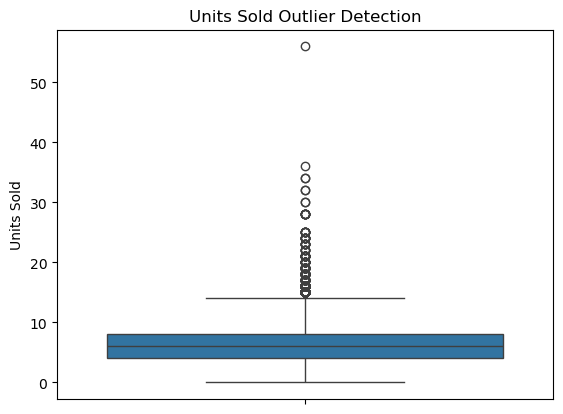

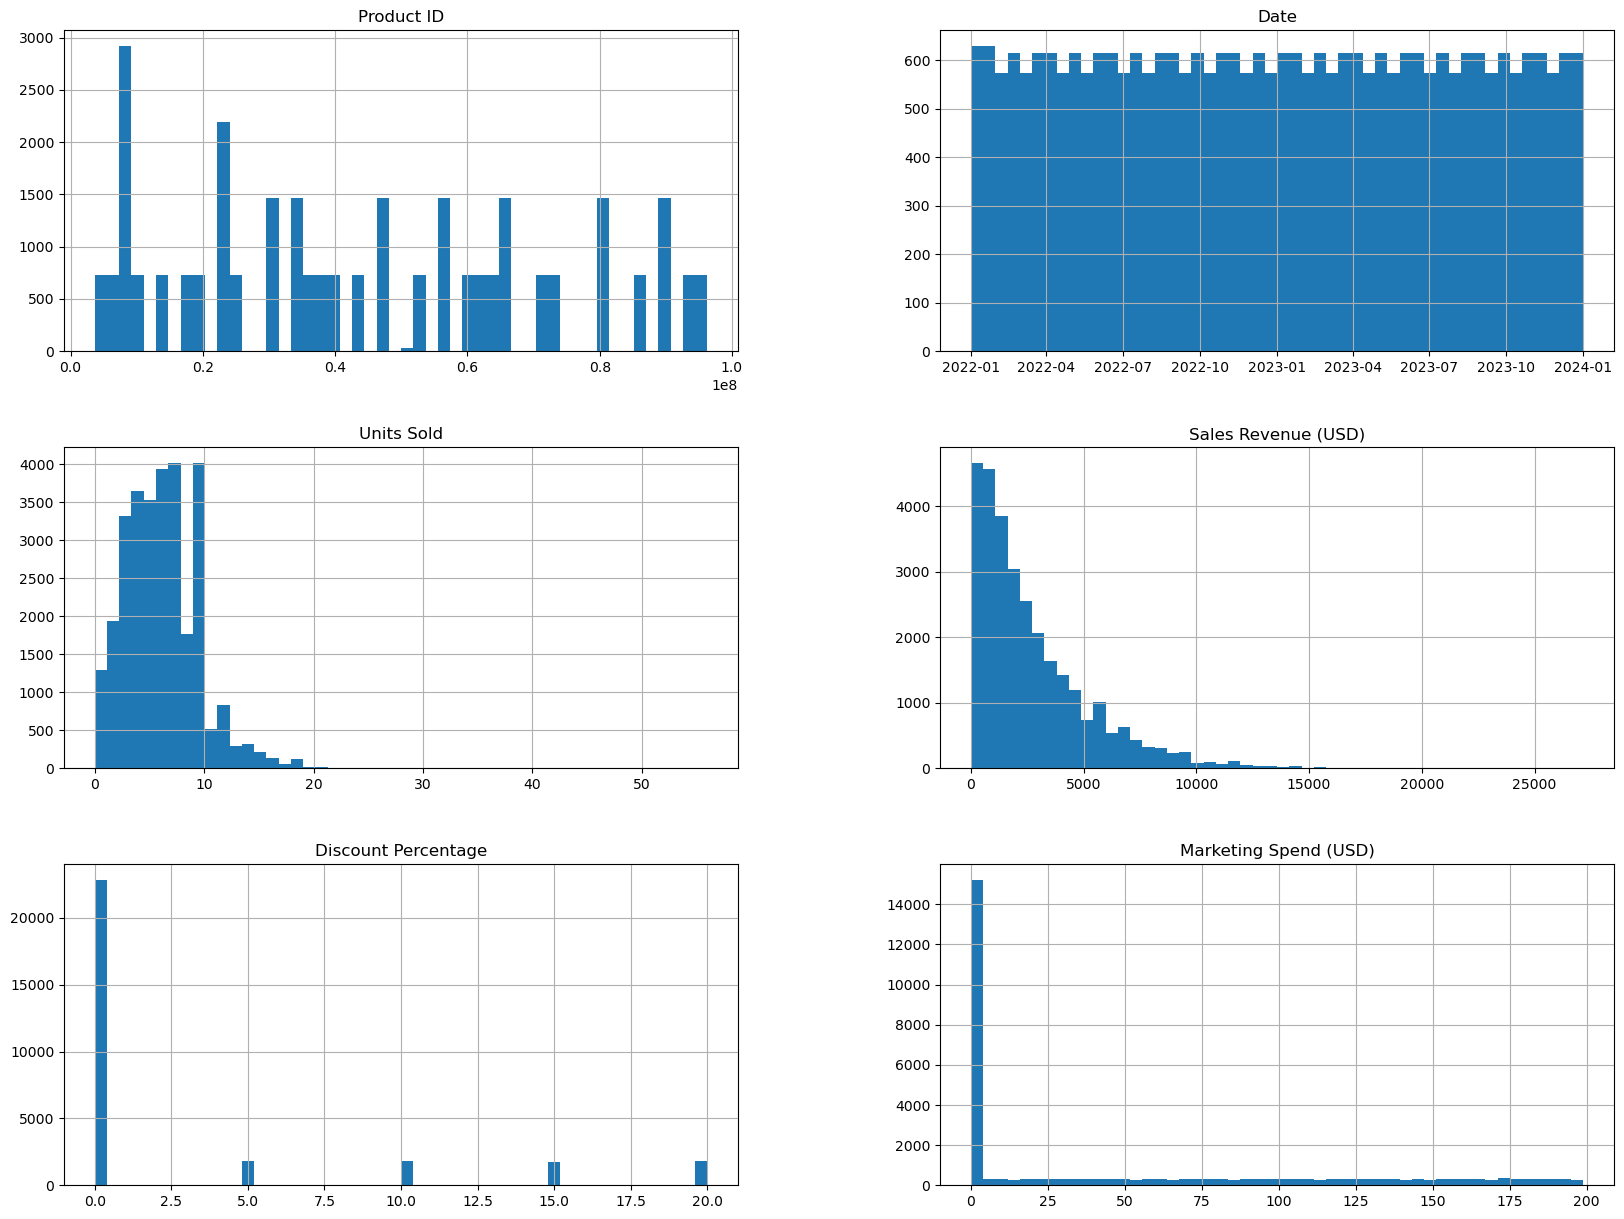

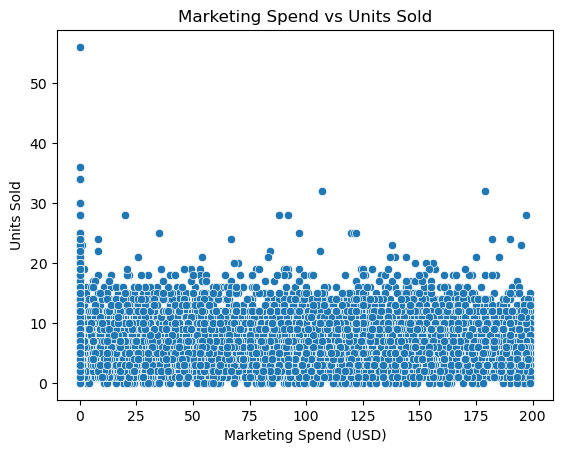

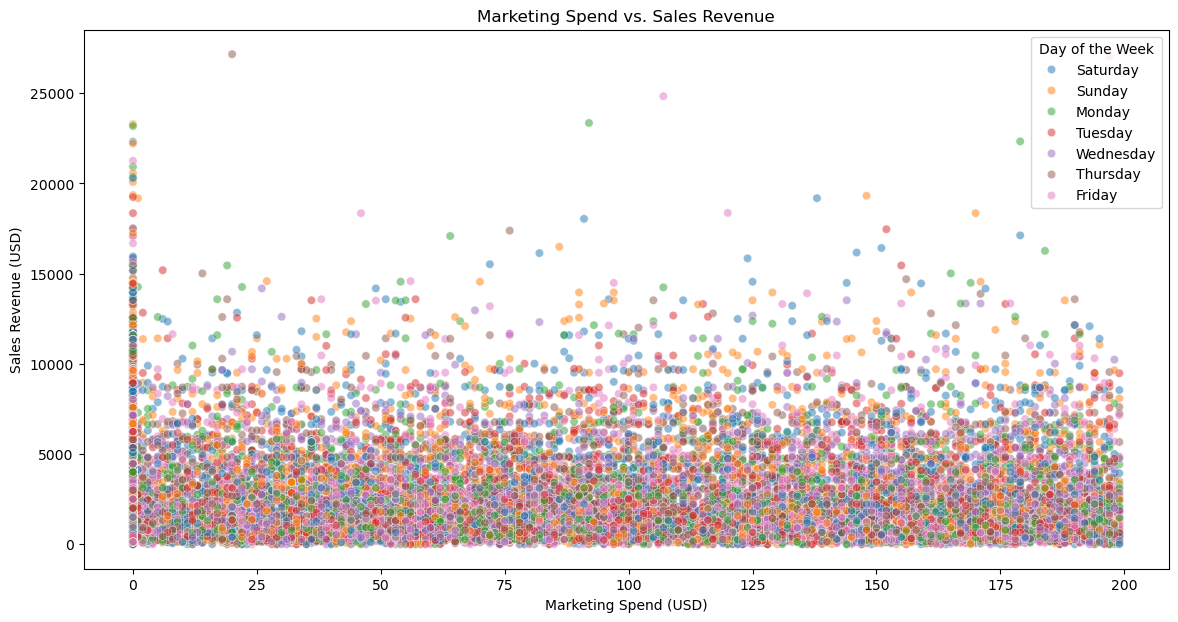

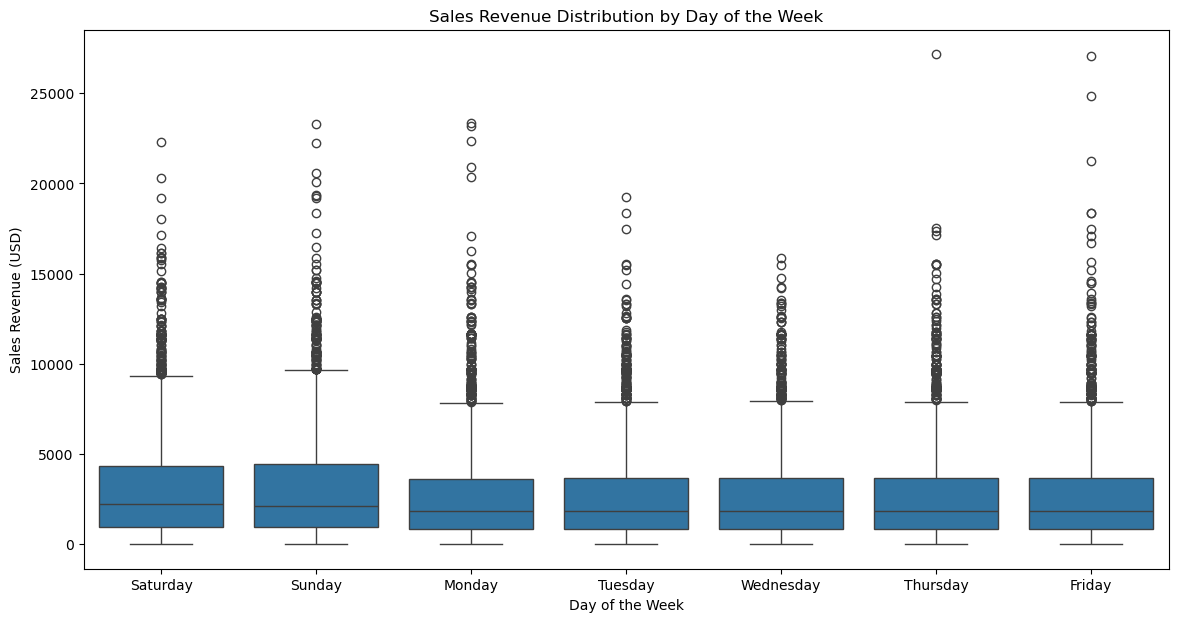

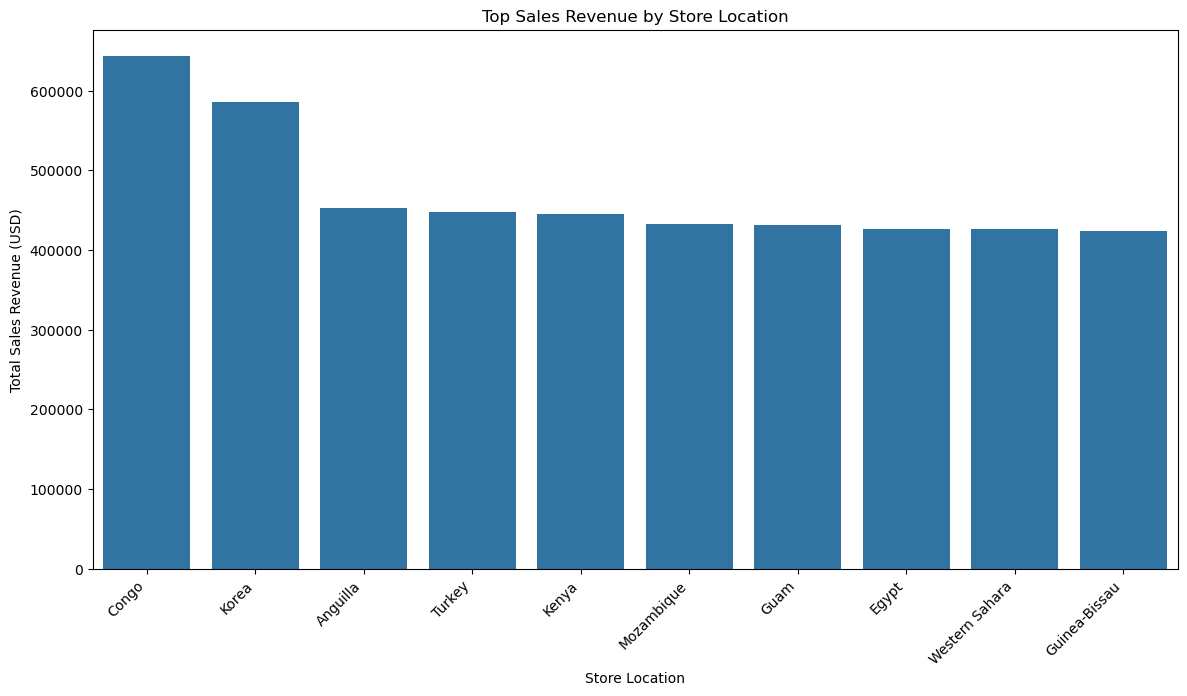

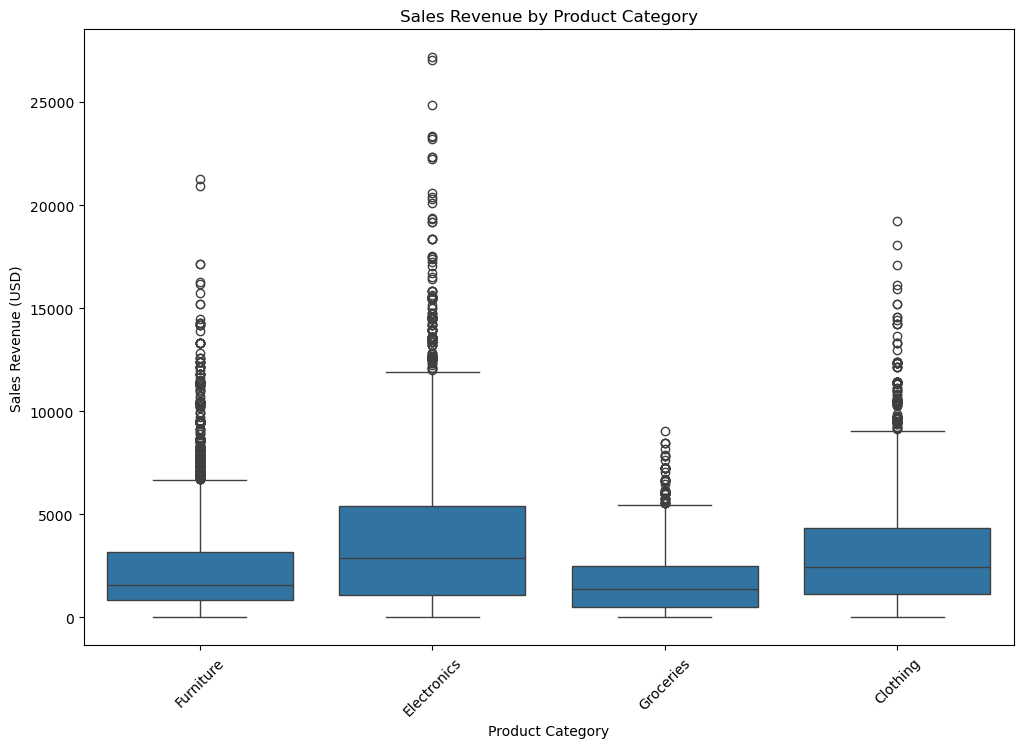

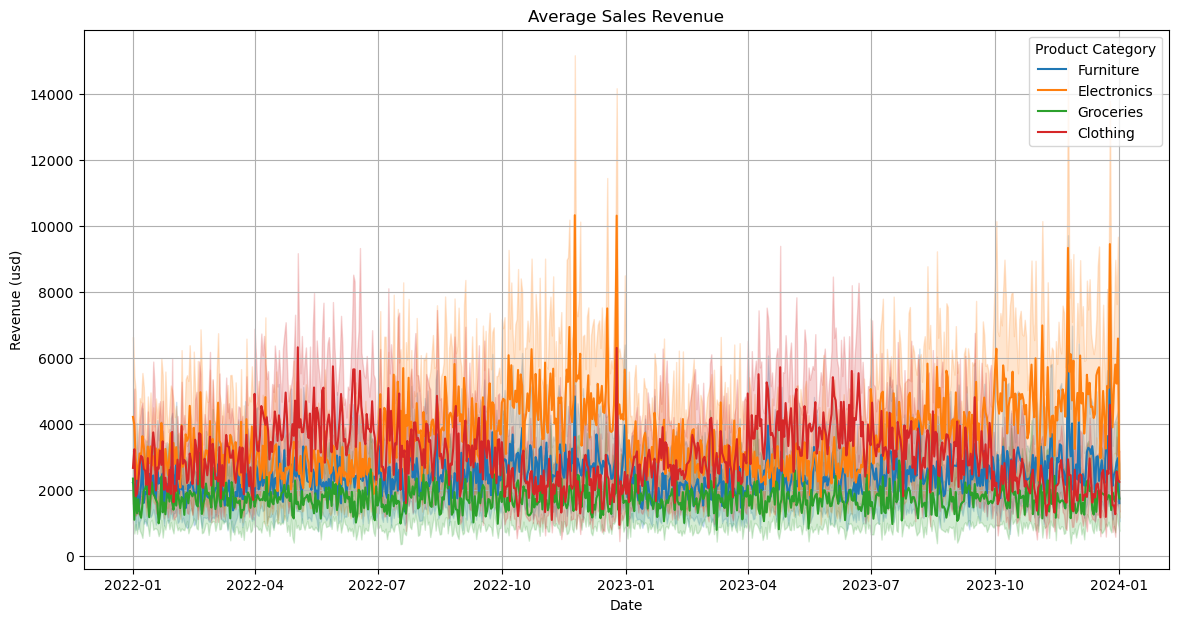

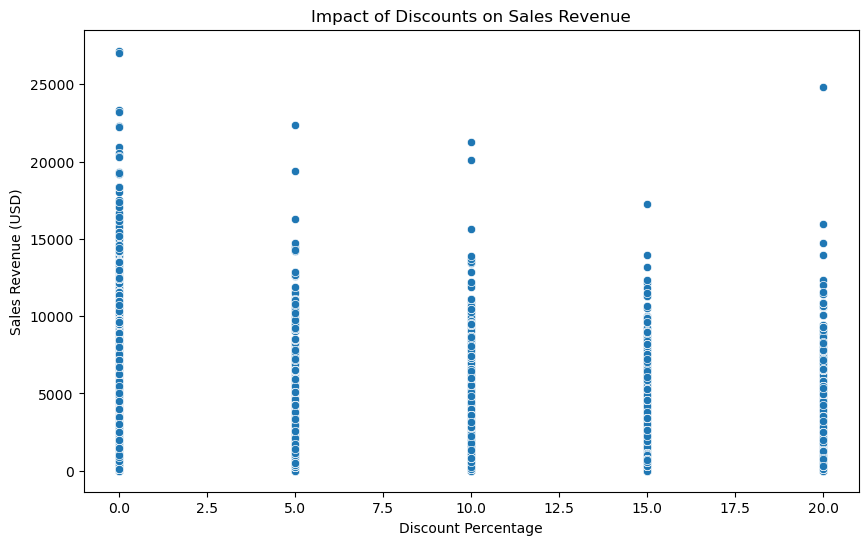

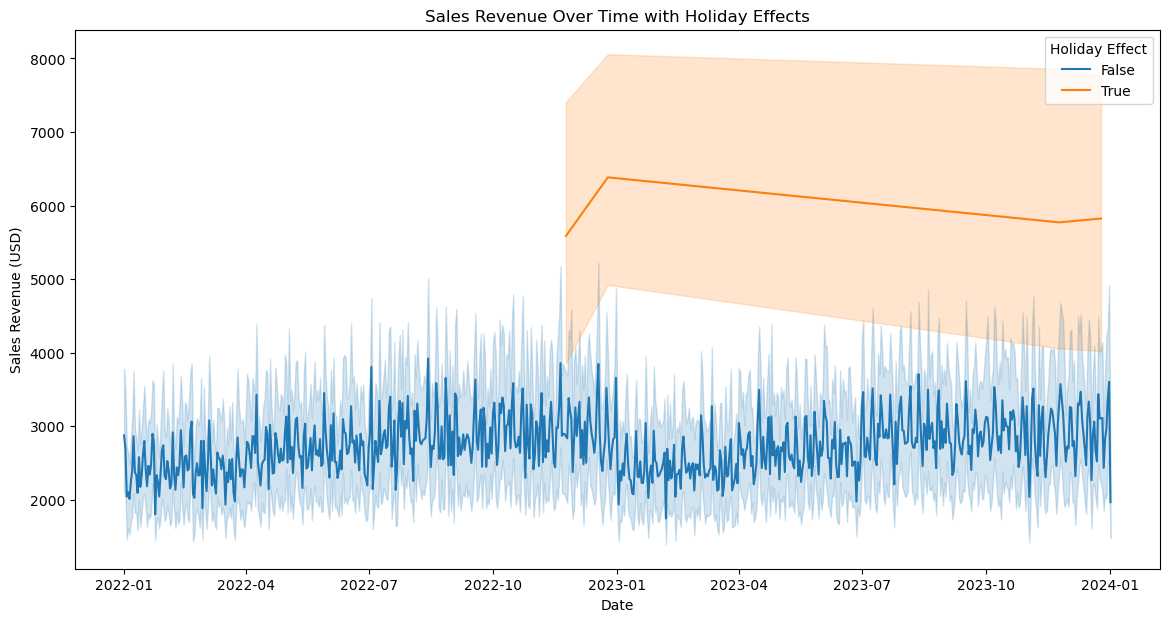

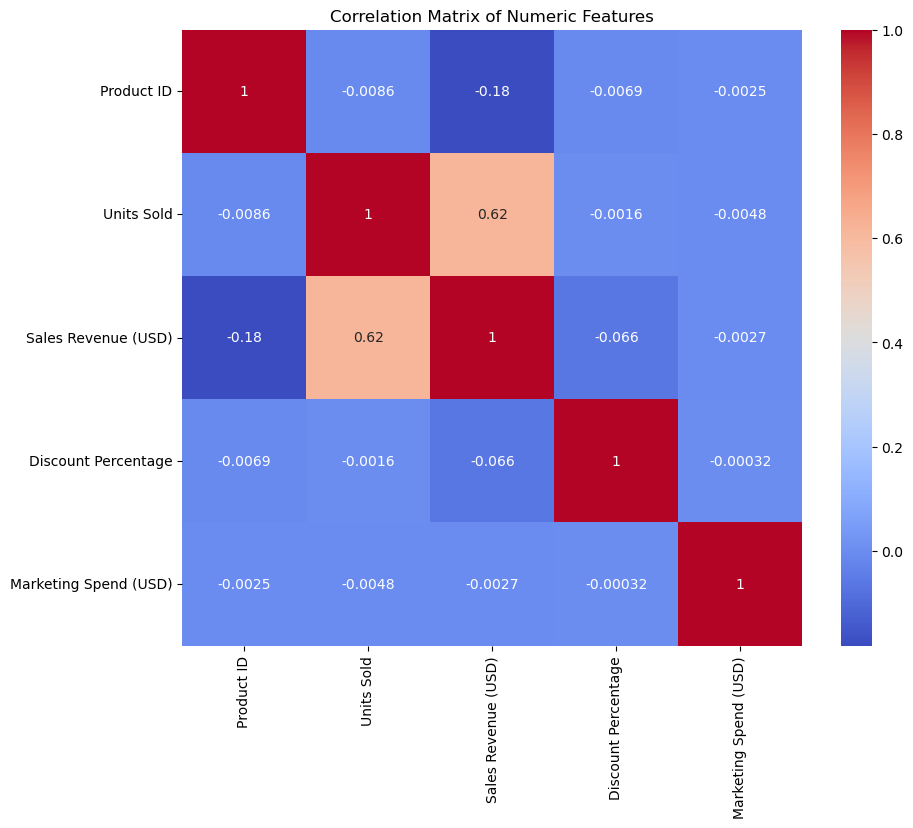

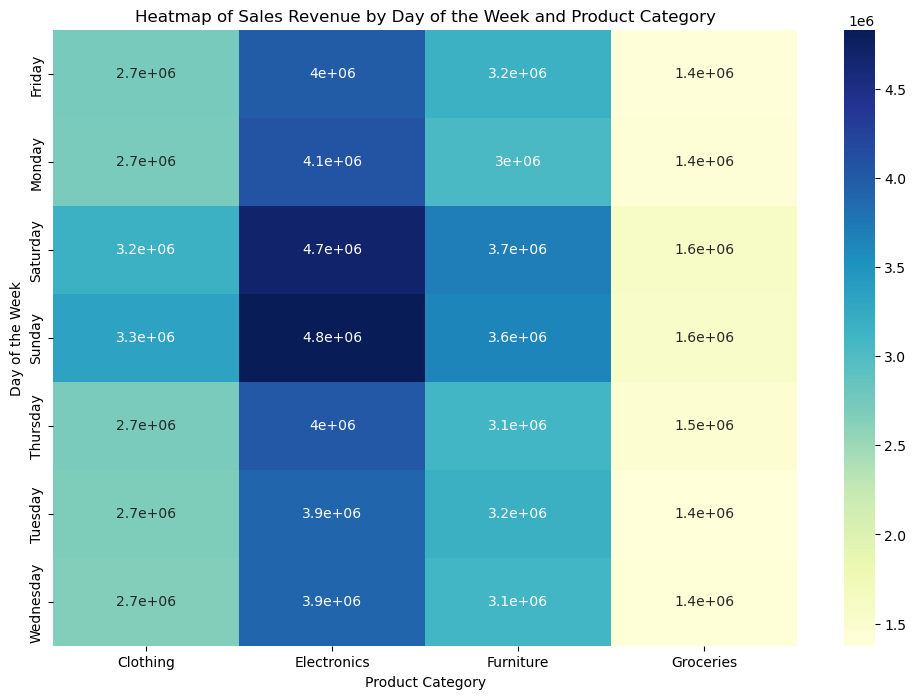

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#######################################################
# Data Wrangling

# Step 1: Load the dataset
df = pd.read_csv('Retail_sales.csv')

#Display info
print("\nInformation About Data:")
print(df.info())
print("\nFirst 5 observations of the dataset:")
print(df.head())
print("\nLast 5 observations of the dataset:")
print(df.tail())
print("\nStatistics Summary of Data:")
print(df.describe())
print("\nCheck for Duplication:")
print(df.nunique())

# Step 2: Check for missing values
print("\nNumber of missing records in each column")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Step 3: Check for duplicate rows
df = df.drop_duplicates()

# Step 4: Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: One-hot encode categorical variables
#df_encoded = pd.get_dummies(df, columns=['Store Location', 'Product Category', 'Day of the Week'])

##
# Check data types
print("\nData Types:")
print(df.dtypes)
# Select columns with object (categorical) data types
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# View the first few rows of the encoded DataFrame
#print(df_encoded.head())

##
# Step 6: Outlier detection
sns.boxplot(df['Units Sold'])
plt.title('Units Sold Outlier Detection')
plt.show()

# Step 7: Extract new features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Step 8: Save the cleaned data
df.to_csv('Retail_sales_cleaned.csv', index=False)

#####################################################

# EDA: Univariate Analysis
df_encoded.hist(bins=50, figsize=(20, 15))
plt.savefig('all.png', dpi=300)
plt.show()

#################################################
# Bivariate Analysis
sns.scatterplot(x='Marketing Spend (USD)', y='Units Sold', data=df_encoded)
plt.title('Marketing Spend vs Units Sold')
plt.savefig('spendVSunits.png', dpi=300)
plt.savefig('spendbyunitssold.png', dpi=300)
plt.show()

# Marketing Spend vs. Sales Revenue
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Marketing Spend (USD)', y='Sales Revenue (USD)', alpha=0.5, hue='Day of the Week')
plt.title('Marketing Spend vs. Sales Revenue')
plt.xlabel('Marketing Spend (USD)')
plt.ylabel('Sales Revenue (USD)')
plt.savefig('revenuebyspend.png', dpi=300)
plt.show()

# Example plot (Already done as a group)
#sns.histplot(df['Units Sold'], bins=50)
#plt.title('Distribution of Units Sold')
#plt.savefig('units_sold_distribution.png', dpi=300)  # Adjust dpi for resolution
#plt.show()

# Save the figure as a PNG file
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Day of the Week', y='Sales Revenue (USD)')
plt.title('Sales Revenue Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Revenue (USD)')
#plt.xticks(rotation=45)
plt.savefig('revenuebyweekday.png', dpi=300)
plt.show()

# Aggregate sales revenue by store location
store_revenue = df.groupby('Store Location')['Sales Revenue (USD)'].sum()

# Sort the values and select the top N store locations
top_n = 10  # Number of top store locations to display
top_store_revenue = store_revenue.sort_values(ascending=False).head(top_n)

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_store_revenue.index, y=top_store_revenue.values)
plt.title('Top Sales Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales Revenue (USD)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment
plt.savefig('revenuebylocation.png', dpi=300)
plt.show()


#Sales Revenue by Product Category

plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Sales Revenue (USD)', data=df)
plt.title('Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Revenue (USD)')
plt.xticks(rotation=45)
plt.savefig('revenuebyproduct.png', dpi=300)
plt.show()

plt.figure(figsize=(14,7))
sns.lineplot(data=df,x='Date',y='Sales Revenue (USD)', hue = 'Product Category',estimator='mean',palette='tab10')
plt.title('Average Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue (usd)')
plt.grid(True)
plt.savefig('revenueproductdate.png', dpi=300)
plt.show()

#Impact of Discounts on Sales Revenue
plt.figure(figsize=(10, 6))
#sns.boxplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df_encoded)
sns.scatterplot(x='Discount Percentage', y='Sales Revenue (USD)', data=df_encoded)
plt.title('Impact of Discounts on Sales Revenue')
plt.xlabel('Discount Percentage')
plt.ylabel('Sales Revenue (USD)')
plt.savefig('revenuediscount.png', dpi=300)
plt.show()

#Sales revenue over time with holiday effect
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Sales Revenue (USD)', hue='Holiday Effect', data=df)
plt.title('Sales Revenue Over Time with Holiday Effects')
plt.xlabel('Date')
plt.ylabel('Sales Revenue (USD)')
plt.legend(title='Holiday Effect')
plt.savefig('revenueholiday.png', dpi=300)
plt.show()

##################################################################
#Multivariate Analysis
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric columns
corr_matrix = numeric_df.corr()

# Plot the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.savefig('corr_matrix.png', dpi=300)
plt.show()

#Heatmap of Sales Revenue by Day of the Week and Product Category
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(index='Day of the Week', columns='Product Category', values='Sales Revenue (USD)', aggfunc='sum')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Sales Revenue by Day of the Week and Product Category')
plt.savefig('salesweekproduct.png', dpi=300)
plt.show()
